## Backpropagation


In [1]:
from IPython.display import display, Math, Latex
from sympy import *
#init_printing(use_latex=True)
init_printing(use_latex='svg')
from IPython.core.display import SVG



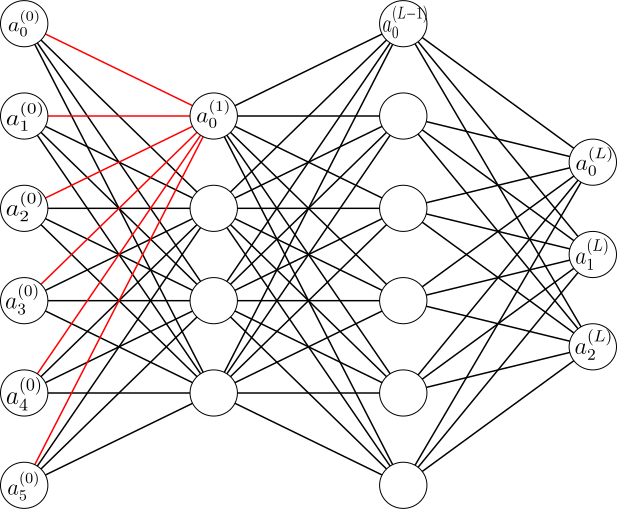

In [2]:
SVG('svg_files/nn_a(1)_0.svg')

Last layer $L$ has $n$ neuron.

Layer $L-1$ has $m$ neuron.

Layer $L-2$ has $p$ neuron.

$\textbf{W}^{(L)}_{n \times m}$

$\textbf{W}^{(L-1)}_{m \times p}$

$\begin{bmatrix}
w_{0,0}^{(1)} &w_{0,1}^{(1)}  & \cdots   &w_{0,5}^{(1)} \\ 
w_{1,0}^{(1)} &w_{1,1}^{(1)}  & \cdots   &w_{1,5}^{(1)} \\ 
 \vdots &  \ddots &  & \\ 
w_{3,0}^{(1)} &w_{3,1}^{(1)}  & \cdots   &w_{3,5}^{(1)} 
\end{bmatrix}
_{4\times6}
\begin{bmatrix}
a^{(0)}_{0}
\\ a^{(0)}_{1}
\\ \vdots
\\ a^{(0)}_{5}
\end{bmatrix}
_{6\times1}
+
\begin{bmatrix}
b^{(1)}_{0}
\\ b^{(1)}_{1}
\\ \vdots
\\ b^{(1)}_{5}
\end{bmatrix}
_{6\times1}
=
\begin{bmatrix}
z^{(1)}_{0}
\\ z^{(1)}_{1}
\\ \vdots
\\ z^{(1)}_{3}
\end{bmatrix}
_{4\times1}$

$a^{(1)}_{0}=\sigma( 
w_{0,0}\times a^{(0)}_{0} +
w_{0,1}\times a^{(0)}_{1}+
w_{0,2}\times a^{(0)}_{2}+
w_{0,3}\times a^{(0)}_{3}+
w_{0,4}\times a^{(0)}_{4}+
w_{0,5}\times a^{(0)}_{5}+b_{0}^{(1)})$

$w_{j,i}^{(L)}$ indicates the weight that connect $i_{th}$ node in $L-1$ layer to $j_{th}$ node in the layer $L$ (We have $k$ neuron in the layer $L-1$)

$z_{j}^{(L)}=w_{j,0}^{(L)}\times a^{(L-1)}_{0} +
w_{j,1}^{(L)}\times a^{(L-1)}_{1}+
\cdots+
w_{j,i}^{(L)}\times a^{(L-1)}_{i}+
\cdots+
w_{j,k}^{(L)}\times a^{(L-1)}_{k}+b_{j}$

$a^{(L)}_{j}=\sigma(z_{j}^{(L)})$

In the last layer we have $n$ output, the cost for our $\textbf{first}$ example in the training set, $c_{0}$ is:

$c_{0}=\sum_{j=0}^{n-1} (a_{j}^{(L)}-y_{j})^2$

## Computing error relative to the changes of weights in the last layer:


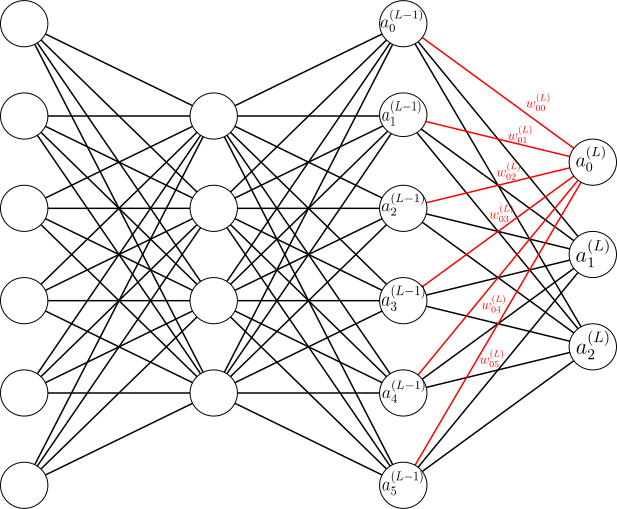

In [72]:
SVG('svg_files/nn_last_layer.svg')


$\frac{\partial c_{0}}{\partial w_{jk}^{(L)}} =
\frac{\partial z_{j}^{(L)}}{\partial w_{jk}^{(L)}}
\frac{\partial a_{j}^{(L)}}{\partial z_{j}^{(L)}}
\frac{\partial c_{0}}{\partial a_{j}^{(L)}}$

## Computing error relative to the changes of biases in the last layer:



$\frac{\partial c_{0}}{\partial b_{j}^{(L)}} =
\frac{\partial z_{j}^{(L)}}{\partial b_{j}^{(L)}}
\frac{\partial a_{j}^{(L)}}{\partial z_{j}^{(L)}}
\frac{\partial C_{0}}{\partial a_{j}^{(L)}}$

### Computing the derivatives:


1) $\frac{\partial c_{0}}{\partial a_{j}^{(L)}}=2(a_{j}^{(L)}-y_{j})$

2) $\frac{\partial a_{j}^{(L)}}{\partial z_{j}^{(L)}}=\sigma^{\prime}(z_{j}^{(L)})$

Assuming activation function is:
$\sigma(x) = \dfrac{1}{1 + e^{-x}}$


$\frac{\sigma(x)}{\partial x} = \sigma(x)(1 - \sigma(x))$
Because:

$\begin{align}
\dfrac{d}{dx} \sigma(x) &= \dfrac{d}{dx} \left[ \dfrac{1}{1 + e^{-x}} \right] \\
&= \dfrac{d}{dx} \left( 1 + \mathrm{e}^{-x} \right)^{-1} \\
&= -(1 + e^{-x})^{-2}(-e^{-x}) \\
&= \dfrac{e^{-x}}{\left(1 + e^{-x}\right)^2} \\
&= \dfrac{1}{1 + e^{-x}\ } \cdot \dfrac{e^{-x}}{1 + e^{-x}}  \\
&= \dfrac{1}{1 + e^{-x}\ } \cdot \dfrac{(1 + e^{-x}) - 1}{1 + e^{-x}}  \\
&= \dfrac{1}{1 + e^{-x}\ } \cdot \left( \dfrac{1 + e^{-x}}{1 + e^{-x}} - \dfrac{1}{1 + e^{-x}} \right) \\
&= \dfrac{1}{1 + e^{-x}\ } \cdot \left( 1 - \dfrac{1}{1 + e^{-x}} \right) \\
&= \sigma(x) \cdot (1 - \sigma(x))
\end{align}$



3) $\frac{\partial z_{j}^{(L)}}{\partial w_{jk}^{(L)}}=a^{(L-1)}_{k}$

4) $\frac{\partial z_{j}^{(L)}}{\partial b_{j}^{(L)}}=1$


Since $\frac{\partial a_{j}^{(L)}}{\partial z_{j}^{(L)}}\frac{\partial c_{0}}{\partial a_{j}^{(L)}}$ is common in $\frac{\partial c_{0}}{\partial b_{j}^{(L)}}$ and $\frac{\partial c_{0}}{\partial w_{jk}^{(L)}}$ we call it $delta$ $\delta^{(L)}_{j}$ which is the error of neuron $j$ in layer $l$:

$\delta^{(L)}_{j} =\frac{\partial a_{j}^{(L)}}{\partial z_{j}^{(L)}}\frac{\partial c_{0}}{\partial a_{j}^{(L)}}=\frac{\partial c}{\partial z_{j}^{(L)}}=2(a_{j}^{(L)}-y_{j})\sigma^{\prime}(z_{j}^{(L)})$

This will give us:

- $\frac{\partial c_{0}}{\partial w_{jk}^{(L)}} =
\frac{\partial z_{j}^{(L)}}{\partial w_{jk}^{(L)}}
\frac{\partial a_{j}^{(L)}}{\partial z_{j}^{(L)}}
\frac{\partial C_{0}}{\partial a_{j}^{(L)}}=2(a_{j}^{(L)}-y_{j})\sigma^{\prime}(z_{j}^{(L)})a^{(L-1)}_{k}=\delta^{(L)}_{j}a^{(L-1)}_{k}$

- $\frac{\partial c_{0}}{\partial b_{j}^{(L)}} =
\frac{\partial z_{j}^{(L)}}{\partial b_{j}^{(L)}}
\frac{\partial a_{j}^{(L)}}{\partial z_{j}^{(L)}}
\frac{\partial C_{0}}{\partial a_{j}^{(L)}}=2(a_{j}^{(L)}-y_{j})\sigma^{\prime}(z_{j}^{(L)})=\delta^{(L)}_{j}$

We can write these equations in vector form:

$\boldsymbol{\delta}^{(L)}
=(\delta^{(L)}_{0},\delta^{(L)}_{1},...,\delta^{(L)}_{n-1} ) 
=\frac{\partial \textbf{c}}{\partial \textbf{z}^{(L)}}
=(\frac{\partial c}{\partial z_{0}^{(L)}} ,\frac{\partial c}{\partial z_{1}^{(L)}},... ,\frac{\partial c}{\partial z_{n-1}^{(L)}} )
=(\frac{\partial a_{0}^{(L)}}{\partial z_{0}^{(L)}}\frac{\partial c}{\partial a_{0}^{(L)}},\frac{\partial a_{1}^{(L)}}{\partial z_{1}^{(L)}}\frac{\partial c}{\partial a_{1}^{(L)}},...\frac{\partial a_{n-1}^{(L)}}{\partial z_{n-1}^{(L)}}\frac{\partial c}{\partial a_{n-1}^{(L)}})
=(2(a_{0}^{(L)}-y_{0})\sigma^{\prime}(z_{0}^{(L)}),2(a_{1}^{(L)}-y_{1})\sigma^{\prime}(z_{1}^{(L)}),...2(a_{n-1}^{(L)}-y_{n-1})\sigma^{\prime}(z_{n-1}^{(L)})) 
=2(\textbf{a}^{(L)}-\textbf{y}) \odot   \sigma^{\prime}(\textbf{z}^{(L)})\tag{1}$

$\frac{\partial \textbf{c}}{\partial \textbf{b}^{(L)}}=\boldsymbol{\delta}^{(L)} \tag{2} $

We have $m-1$ neuron in the layer $L-1$ 
- $\frac{\partial \textbf{c}}{\partial \textbf{w}_{j}^{(L)}}
=(\frac{\partial z_{j}^{(L)}}{\partial w_{j0}^{(L)}}
\frac{\partial a_{j}^{(L)}}{\partial z_{j}^{(L)}}
\frac{\partial c_{0}}{\partial a_{j}^{(L)}},
\frac{\partial z_{j}^{(L)}}{\partial w_{j1}^{(L)}}
\frac{\partial a_{j}^{(L)}}{\partial z_{j}^{(L)}}
\frac{\partial c_{0}}{\partial a_{j}^{(L)}},...,
\frac{\partial z_{j}^{(L)}}{\partial w_{jm-1}^{(L)}}
\frac{\partial a_{j}^{(L)}}{\partial z_{j}^{(L)}}
\frac{\partial c_{0}}{\partial a_{j}^{(L)}})
=(\delta^{(L)}_{j}a^{(L-1)}_{0},\delta^{(L)}_{j}a^{(L-1)}_{1},...,\delta^{(L)}_{j}a^{(L-1)}_{m-1})
=\delta_{j}^{(L)} \textbf{a}^{(L-1)}$

and if we write it in the matrix form:
$ \frac{\partial \textbf{c}}{\partial \textbf{W}^{(L)}}=
\begin{bmatrix}
\delta^{(L)}_{0}a^{(L-1)}_{0} & \delta^{(L)}_{0}a^{(L-1)}_{1}&...&\delta^{(L)}_{0}a^{(L-1)}_{m-1}\\ 
\delta^{(L)}_{1}a^{(L-1)}_{0} & \delta^{(L)}_{1}a^{(L-1)}_{1}&...&\delta^{(L)}_{1}a^{(L-1)}_{m-1}\\
\vdots & \vdots & \vdots &\vdots \\ 
\delta^{(L)}_{j}a^{(L-1)}_{0} & \delta^{(L)}_{j}a^{(L-1)}_{1}&...&\delta^{(L)}_{j}a^{(L-1)}_{m-1}\\
\vdots & \vdots & \vdots &\vdots \\ 
\delta^{(L)}_{n-1}a^{(L-1)}_{0} & \delta^{(L)}_{n-1}a^{(L-1)}_{1}&...&\delta^{(L)}_{n-1}a^{(L-1)}_{m-1}\\ 
\end{bmatrix}
=\begin{bmatrix}
\delta^{(L)}_{0}\\ 
\delta^{(L)}_{1}\\ 
\vdots
 \\ 
\delta^{(L)}_{j}\\ 
\vdots \\
\delta^{(L)}_{n-1}
\end{bmatrix}
\cdot
\begin{bmatrix}
a^{(L-1)}_{0} & a^{(L-1)}_{1}&...&a^{(L-1)}_{m-1}\\ 
\end{bmatrix}=
\boldsymbol{\delta}^{(L)} \cdot \textbf{a}^{(L-1)}\top \tag{3}$

## Computing error relative to the changes of weights in the previous layers:

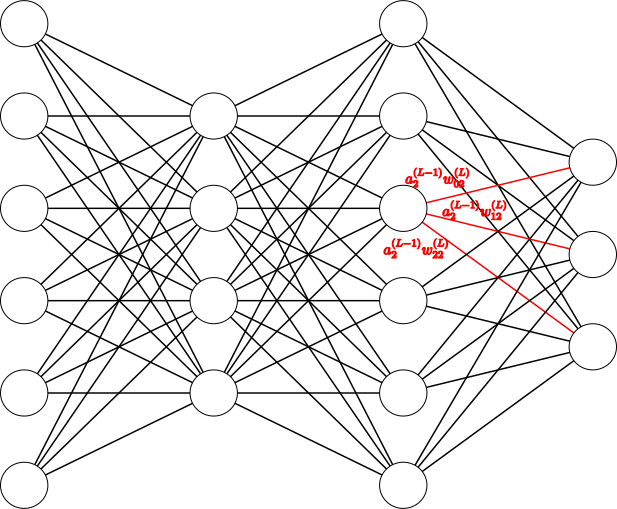

In [75]:
SVG('svg_files/nn_l-1_layer_a.svg')

we know that $a_{k}^{(L-1)}$ (layer $L-1$ has $m$ neurons) has effect on all neuron in the layer $L$ layer (which has $n$ neurons), so to compute the rate of changes of error with respect to $a_{k}^{(L-1)}$ :

$\frac{\partial c_{0}}{\partial a_{k}^{(L-1)}} =
\sum_{j=0}^{n-1}( 
\frac{\partial z_{j}^{(L)}}{\partial a_{k}^{(L-1)}}
\frac{\partial a_{j}^{(L)}}{\partial z_{j}^{(L)}}
\frac{\partial C_{0}}{\partial a_{j}^{(L)}})
$

We know:

$z_{j}^{(L)}=w_{j,0}^{(L)}\times a^{(L-1)}_{0} +
w_{j,1}^{(L)}\times a^{(L-1)}_{1}+
\cdots+
w_{j,i}^{(L)}\times a^{(L-1)}_{i}+
\cdots+
w_{j,k}^{(L)}\times a^{(L-1)}_{k}+b_{j}$

Therefore:

$\frac{\partial z_{j}^{(L)}}{\partial a_{k}^{(L-1)}}=w_{jk}^{(L)}$

Subsequently we have:


$\frac{\partial c_{0}}{\partial a_{k}^{(L-1)}} =
\sum_{i=0}^{n-1} 2(a_{i}^{(L)}-y_{i})\sigma^{\prime}(z_{i}^{(L)}) w_{ik}^{(L)}=
\sum_{i=0}^{n-1} \delta^{(L)}_{i}w_{ik}^{(L)}
$

$\textbf{Reminder:}$

Last layer $L$ has $n$ neuron.

Layer $L-1$ has $m$ neuron.

Layer $L-2$ has $p$ neuron.

$\textbf{W}^{(L)}_{n \times m}$

$\textbf{W}^{(L-1)}_{m \times p}$

$\textbf{W}^{(L)}_{n\times m}=\begin{bmatrix}
w_{0,0}^{(L)} &w_{0,1}^{(L)}  & \cdots   &w_{0,m-1}^{(L)} \\ 
w_{1,0}^{(L)} &w_{1,1}^{(L)}  & \cdots   &w_{1,m-1}^{(L)} \\ 
 \vdots &  \ddots &  & \\ 
w_{n-1,0}^{(L)} &w_{n-1,1}^{(L)}  & \cdots   &w_{n-1,m-1}^{(L)} 
\end{bmatrix}
_{n\times m}$

$\textbf{W}^{(L)}_{m\times n}\top=\begin{bmatrix}
w_{0,0}^{(L)} &w_{1,0}^{(L)}  & \cdots   & w_{n-1,0}^{(L)}\\ 
w_{0,1}^{(L)} &w_{1,1}^{(L)}  & \cdots   &w_{1,n-1}^{(L)} \\ 
 \vdots &  \ddots &  & \\ 
w_{0,m-1}^{(L)} &w_{m-1,1}^{(L)}  & \cdots   &w_{m-1,n-1}^{(L)} 
\end{bmatrix}
_{m\times n}$

$\boldsymbol\delta^{(L)}=\begin{bmatrix}
\delta^{(L)}_{0}\\ 
\delta^{(L)}_{1}\\ 
\vdots
 \\ 
\delta^{(L)}_{j}\\ 
\vdots \\
\delta^{(L)}_{n-1}
\end{bmatrix}$

$\boldsymbol \sigma'(z^{(L-1)})=
\begin{bmatrix}
\sigma'(z^{(L-1)}_{0})\\ 
\sigma'(z^{(L-1)}_{1})\\ 
\vdots\\
\sigma'(z^{(L-1)}_{m-1})
\end{bmatrix}$

$\textbf{a}^{(L-2)}\top=
\begin{bmatrix}
a^{(L-2)}_{0} & a^{(L-2)}_{1}&...&a^{(L-2)}_{p-1}\\ 
\end{bmatrix}$

Now to compute the error relative to weight in layer $L-1$:

$\frac{\partial c_{0}}{\partial w_{jk}^{(L-1)}} =
\frac{\partial z_{j}^{(L-1)}}{\partial w_{jk}^{(L-1)}}
\frac{\partial a_{j}^{(L-1)}}{\partial z_{j}^{(L-1)}}\frac{\partial c_{0}}{\partial a_{j}^{(L-1)}}=
\frac{\partial z_{j}^{(L-1)}}{\partial w_{jk}^{(L-1)}}
\frac{\partial a_{j}^{(L-1)}}{\partial z_{j}^{(L-1)}}
\sum_{i=0}^{n-1} \delta^{(L)}_{i}w_{ij}^{(L)}=
a_{k}^{(L-2)}
\sigma' (z_{j}^{(L-1)})
\sum_{i=0}^{n-1} \delta^{(L)}_{i}w_{ij}^{(L)}$

$\frac{\partial c_{0}}{\partial w_{jk}^{(L-1)}} =
a_{k}^{(L-2)}
\sum_{i=0}^{n-1} \delta^{(L)}_{i}w_{ij}^{(L)}=
 \left (   (\textbf{W}^{(L)}_{(0:n-1,j)} \top)\cdot  \boldsymbol\delta^{(L)}\right ) \sigma' (z_{j}^{(L-1)})
 a_{k}^{(L-2)}$



This was only one element in the $\textbf{W}^{(L-1)}_{m \times p}$, If we write it for entire matrix:




$\frac{\partial\textbf{c}}{\partial\textbf{W}^{(L-1)}}_{m\times p}=
%W
\begin{eqnarray} 
   (\begin{bmatrix}
w_{0,0}^{(L)} &w_{1,0}^{(L)}  & \cdots   & w_{n-1,0}^{(L)}\\ 
w_{0,1}^{(L)} &w_{1,1}^{(L)}  & \cdots   &w_{1,n-1}^{(L)} \\ 
 \vdots &  \ddots &  & \\ 
w_{0,m-1}^{(L)} &w_{m-1,1}^{(L)}  & \cdots   &w_{m-1,n-1}^{(L)} 
\end{bmatrix}
_{m\times n}
%delta 
\begin{bmatrix}
\delta^{(L)}_{0}\\ 
\delta^{(L)}_{1}\\ 
\vdots
 \\ 
\delta^{(L)}_{j}\\ 
\vdots \\
\delta^{(L)}_{n-1}
\end{bmatrix}_{n \times 1})
\odot 
%sigma prime
\begin{bmatrix}
\sigma'(z^{(L-1)}_{0})\\ 
\sigma'(z^{(L-1)}_{1})\\ 
\vdots\\
\sigma'(z^{(L-1)}_{m-1})
\end{bmatrix}_{m\times 1}
\end{eqnarray}
\cdot 
%a L-2 vector
\begin{bmatrix}
a^{(L-2)}_{0} & a^{(L-2)}_{1}&...&a^{(L-2)}_{p-1}\\ 
\end{bmatrix}_{p \times 1}$


$\frac{\partial\textbf{c}}{\partial\textbf{W}^{(L-1)}}=
\begin{eqnarray} 
   ((\textbf{W}^{(L)})^T \boldsymbol\delta^{(L)}) \odot \boldsymbol\sigma'(z^{(L-1)})
\end{eqnarray}
\cdot \textbf{a}^{(L-2)}\top$

Now let's compute $\delta_k^{(L-1)}$:


$\delta_k^{(L-1)} = \frac{\partial C}{\partial z_k^{(L-1)}} = \sum_j ^{n-1} \frac{\partial C}{\partial z_j^{(L)}} \frac{\partial z_j^{(L)}}{\partial z_k^{(L-1)}} = \sum_j  \delta_j^{(L)}\frac{\partial z_j^{(L)}}{\partial z_k^{(L-1)}}$

Since:
$z^{(L)}_j = \sum_{k} w_{jk}^{(L)} \sigma(z_k^{(L) - 1}) + b_j^{(L)}$

The partial derivative is:

$\frac{\partial z_j^{(L)}}{\partial z_K^{(L-1)}} = w_{jK}^{(L)}\sigma'(z_{K}^{(L-1)})$


Putting these pieces together we have:

$\delta_k^{(L-1)} =\sum_j^{n-1} \delta_j^{(L)}\frac{\partial z_j^{(L)}}{\partial z_K^{(L-1)}}= \sum_j^{n-1}  (\delta_j^{(L)}  w_{jK}^{(L)})\sigma'(z_{K}^{(L-1)})$



$\begin{eqnarray} 
  \boldsymbol\delta^{(L-1)}=\frac{\partial c}{\partial z^{(L-1)}}  = ((\textbf{W}^{(L)})^T \boldsymbol\delta^{(L)}) \odot \sigma'(z^{(L-1)})
\end{eqnarray}\tag{4}$


$\frac{\partial\textbf{c}}{\partial \textbf{b}^{(L-1)}}=\boldsymbol\delta^{(L-1)}\tag{5}$



$\frac{\partial\textbf{c}}{\partial\textbf{W}^{(L-1)}}=\boldsymbol\delta^{(L-1)}\cdot \textbf{a}^{(L-2)}\top\tag{6}$


So that was only for the $\textbf{first}$ item in the training set, you feed the rest of the training set into the network and for each $w_{jk}^{(L)}$ you make an average over all of them. Then that's the vector that you should use in your gradient descent function. In the output layer use equations (1), (2), (3) and in the hidden layers use equation (4), (5) and 6:

$\textbf{W}_{new}=\textbf{W}_{initial}-\eta \nabla (\textbf{W}_{initial})$

$\textbf{b}_{new}=\textbf{b}_{initial}-\eta \nabla (\textbf{b}_{initial})$



So you usually randomly shuffle your training set into batches called mini batches and compute the gradient for every batch.
Ref: [1](https://stats.stackexchange.com/questions/414825/how-exactly-is-the-error-backpropagated-in-backpropagation), [2](https://www.youtube.com/watch?v=xClK__CqZnQ)